# Vehicle's Market Price - EDA

This is the **E**xploratory **D**ata **A**nalysis for the vehicle's market price dataset. In this analysis, we are going to analyze the different variables of the model in relation to the vehicle's prices for a better understanding of the dataset.

Here are the steps of the analysis:

### Step 1 - Packages

In [11]:
import pandas as pd
import altair as alt
import pandas_profiling
from sklearn.model_selection import train_test_split

from vega_datasets import data

In [2]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

### Step 2 - Data loading

For this model we are using a dataset of vehicle prices downloaded from Austin Reese's public repository in [kaggle](https://www.kaggle.com/austinreese/craigslist-carstrucks-data). This dataset contains 509,577 used cars listings with their market price.

In [2]:
vehicles = pd.read_csv("../data/vehicles.csv").drop(columns = ['description', 'county'])

In [4]:
len(vehicles)

509577

In [13]:
vehicles = vehicles.rename(columns = {"lat": "latitude", "long": "longitude"})
vehicles, vehicles_test = train_test_split(vehicles, train_size = 0.9, random_state = 1234)

len(vehicles)

412757

In [14]:
vehicles.to_csv("../data/train.csv")
vehicles_test.to_csv("../data/test.csv")

### Step 3 - Dataset head

In [15]:
vehicles.head()

id                                                url  \
95961   7044023069  https://modesto.craigslist.org/ctd/d/modesto-2...   
363720  7033740323  https://santafe.craigslist.org/ctd/d/corrales-...   
194921  7049422419  https://macon.craigslist.org/ctd/d/clearwater-...   
482311  7047595927  https://austin.craigslist.org/ctd/d/austin-200...   
248243  7040364213  https://bgky.craigslist.org/ctd/d/hardinsburg-...   

                       region                      region_url  price    year  \
95961                 modesto  https://modesto.craigslist.org  17999  2018.0   
363720        santa fe / taos  https://santafe.craigslist.org   4995  2005.0   
194921  macon / warner robins    https://macon.craigslist.org  34900  2013.0   
482311                 austin   https://austin.craigslist.org   8000  2006.0   
248243          bowling green     https://bgky.craigslist.org   3095  2007.0   

       manufacturer                             model  condition    cylinders  \
95961         honda                             civic   like new          NaN   
363720       subaru               legacy wagon (natl)  excellent  4 cylinders   
194921          NaN  Kenworth KW T700 Cummins ISX, 13        NaN          NaN   
482311       toyota                            tacoma   like new  6 cylinders   
248243    chevrolet                           equinox       good  6 cylinders   

        ... transmission                vin drive       size   type  \
95961   ...    automatic                NaN   NaN        NaN    NaN   
363720  ...    automatic  4S4BP61CX57341089   4wd   mid-size  wagon   
194921  ...    automatic                NaN   NaN        NaN  other   
482311  ...    automatic  3TMJU62N46M019614   NaN        NaN    NaN   
248243  ...    automatic  2CNDL13F376240252   fwd  full-size    SUV   

       paint_color                                          image_url state  \
95961         grey  https://images.craigslist.org/00909_cVUR9LbjBa...    ca   
363720       green  https://images.craigslist.org/00d0d_2h5rbnaJmd...    nm   
194921       black  https://images.craigslist.org/00F0F_ahE8sp4niJ...    ga   
482311         NaN  https://images.craigslist.org/00H0H_7sMNg60rPq...    tx   
248243        blue  https://images.craigslist.org/00s0s_kGTJOVmAT3...    ky   

       latitude longitude  
95961   37.6361 -120.9970  
363720  35.2300 -106.6780  
194921  27.8953  -82.7138  
482311  30.2063  -97.7956  
248243  37.8423  -86.4875  

[5 rows x 23 columns]

### Step 4 - Data Description

In this dataset we have 17 categorical variables and 7 numerical variables, with the following description:

**Categorical variables:**
- `URL`: The url of the listing on Craiglist
- `Region`: Region where the listing was posted
- `region_url`: Craiglist's Region URL 
- `manufacturer`: Vehicle manufacturer
- `model`: Vehicle model
- `condition`: Vehicle condition according to the user (eg. 'excellent', 'like new')
- `cylinders`: Number of cylinders of the vehicle
- `fuel`: Vehicle fuel type
- `title_status`: Status of the vehicle (eg. 'rebuilt', 'clean')
- `transmission`: Transmission of the vehicle
- `vin`: VIN number of the vehicle
- `drive`: type of drive of the vehicle (eg. '4wd', 'fwd')
- `size`: Size of the vehicle
- `type`: Type of the vehicle (eg. 'SUV', 'pickup', 'sedan')
- `paint_color`: Color of the paint of the vehicle
- `image_url`: URL of the picture of the vehicle
- `state`: State where the listing is posted

**Numerical variables:**
- `id`: id of the listing
- `year`: vehicle's manufacturing year
- `price`: **Response**, price of the vehicle
- `odometer`: Mileage of the vehicle at the moment the listing was posted
- `latitude`: Latitude of the state
- `longitude`: Longitude of the state

The following code shows the variables and their non-null count

In [16]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412757 entries, 95961 to 307614
Data columns (total 23 columns):
id              412757 non-null int64
url             412757 non-null object
region          412757 non-null object
region_url      412757 non-null object
price           412757 non-null int64
year            411517 non-null float64
manufacturer    394319 non-null object
model           406252 non-null object
condition       224962 non-null object
cylinders       251171 non-null object
fuel            409498 non-null object
odometer        338019 non-null float64
title_status    410275 non-null object
transmission    409755 non-null object
vin             244809 non-null object
drive           296226 non-null object
size            135789 non-null object
type            298305 non-null object
paint_color     279598 non-null object
image_url       412745 non-null object
state           412757 non-null object
latitude        404367 non-null float64
longitude       404367 non

In order to explore the numerical variables, we used the pd.describe() function. Here we can observe that the maximum market price is $360'000.000 USD.

In [17]:
vehicles.describe()

id         price           year      odometer       latitude  \
count  4.127570e+05  4.127570e+05  411517.000000  3.380190e+05  404367.000000   
mean   7.044174e+09  5.797716e+04    2009.661222  1.017470e+05      38.451662   
std    4.938650e+06  9.905233e+06       8.585456  1.100249e+05       5.900683   
min    6.995212e+09  0.000000e+00    1900.000000  0.000000e+00     -82.688100   
25%    7.040801e+09  3.995000e+03    2007.000000  4.947300e+04      34.543800   
50%    7.045324e+09  9.399000e+03    2011.000000  9.472000e+04      39.137800   
75%    7.048556e+09  1.798800e+04    2015.000000  1.385870e+05      42.448000   
max    7.050103e+09  3.600029e+09    2021.000000  1.000000e+07      81.569300   

           longitude  
count  404367.000000  
mean      -94.319971  
std        17.716701  
min      -160.399000  
25%      -108.546000  
50%       -88.678800  
75%       -81.125200  
max        94.124800

You can see that the dataset contains prices that are bigger than what you expect from an used car's market price. During a closer revision, we realized these outliers are scrapping errors. Hence, we are going to remove these values to improve the EDA.

In [18]:
price_99 = vehicles.price.quantile(0.99)
vehicles = vehicles.query('price < @price_99')

Now it looks a bit better

In [19]:
vehicles.describe()

id          price           year      odometer  \
count  4.086180e+05  408618.000000  407539.000000  3.344880e+05   
mean   7.044174e+09   11953.996256    2009.639158  1.023729e+05   
std    4.938088e+06   10320.508415       8.501208  1.100252e+05   
min    6.995212e+09       0.000000    1900.000000  0.000000e+00   
25%    7.040800e+09    3995.000000    2007.000000  5.053475e+04   
50%    7.045322e+09    8999.000000    2011.000000  9.535000e+04   
75%    7.048556e+09   17500.000000    2015.000000  1.390000e+05   
max    7.050103e+09   49997.000000    2021.000000  1.000000e+07   

            latitude      longitude  
count  400266.000000  400266.000000  
mean       38.453331     -94.259002  
std         5.897719      17.701519  
min       -82.688100    -160.399000  
25%        34.560000    -108.156000  
50%        39.145300     -88.527900  
75%        42.447900     -81.093000  
max        81.569300      94.124800

In addition, we analyzed the frequency of the levels of the categorical variables

In [20]:
numeric_features = ['year', 'odometer']
categorical_features = ['state','manufacturer','model', 'condition', 'cylinders', 'fuel',
                        'title_status', 'transmission', 'size', 'type', 'paint_color']

In [21]:
for feat in categorical_features:
    print('Feature: %s' %(feat))
    print('------------')
    print(f'This feature has {len(vehicles[feat].unique())} levels')
    print('------------')
    print(vehicles[feat].value_counts())
    print('\n\n')

Feature: state
------------
This feature has 51 levels
------------
ca    42192
fl    28261
tx    23637
ny    17981
mi    16964
oh    15559
nc    15534
or    15352
pa    12521
wa    12498
wi    12065
tn    11139
va    10479
co    10151
il     9571
ia     9086
nj     8200
id     8068
mn     7945
ma     7659
sc     7207
az     6885
al     6724
mt     6457
ga     6001
in     5955
ar     5744
ks     5743
mo     5435
ct     5374
ok     5345
ky     4746
md     4179
la     3564
nm     3342
ak     3107
ri     2426
nv     2418
vt     2403
dc     2392
nh     2385
me     2376
hi     2373
ne     2119
ms     2017
sd     1826
wv     1309
ut     1285
de     1117
wy      838
nd      664
Name: state, dtype: int64



Feature: manufacturer
------------
This feature has 44 levels
------------
ford               74021
chevrolet          59257
toyota             30779
nissan             21366
ram                21090
honda              20637
jeep               19344
gmc                18436
dodge           

### Step 5 - Data Visualizations

#### Correlations

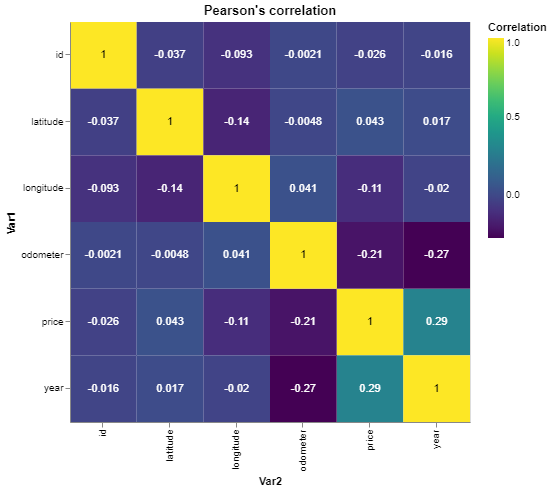

In [22]:
vehicles_corr = vehicles.corr().reset_index().rename(columns = {'index':'Var1'}).melt(id_vars = ['Var1'],
                                                                                    value_name = 'Correlation',
                                                                                    var_name = 'Var2')
base = alt.Chart(vehicles_corr).encode(
    alt.Y('Var1:N'),
    alt.X('Var2:N')
) 

heatmap = base.mark_rect().encode(
     alt.Color('Correlation:Q',
                scale=alt.Scale(scheme='viridis'))
)

text = base.mark_text(baseline='middle').encode(
    text=alt.Text('Correlation:Q', format='.2'),
    color=alt.condition(
        alt.datum.Correlation >= 0.95,
        alt.value('black'),
        alt.value('white')
    )
)

(heatmap + text).properties(
    width = 400,
    height = 400,
    title = "Pearson's correlation"
)

#### Frequency map

In [23]:
vehicles['state'] = vehicles['state'].str.upper()
vehicles_position = vehicles.dropna(subset = ['latitude', 'longitude'])[['state','latitude', 'longitude','price', 'id']]

vehicles_position = vehicles_position.groupby(by = "state")\
                                     .agg({'price': 'mean',
                                          'longitude' : 'mean',
                                          'latitude' : 'mean',
                                          'id': 'count'})\
                                     .reset_index()

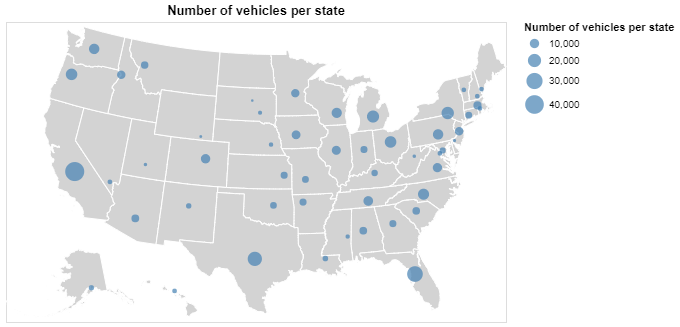

In [24]:
states = alt.topo_feature(data.us_10m.url, feature='states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

points = alt.Chart(vehicles_position).transform_aggregate(
    latitude='mean(latitude)',
    longitude='mean(longitude)',
    count='sum(id)',
    groupby=['state']
).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.Size('count:Q', title='Number of vehicles per state'),
    color=alt.value('steelblue'),
    tooltip=[alt.Tooltip('state:N', title='state'), alt.Tooltip('count:Q', title='Price', format=',.2f')]
).properties(
    title='Number of vehicles per state'
)
background + points

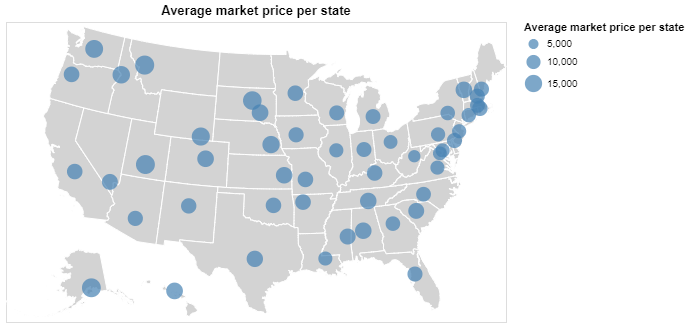

In [25]:
states = alt.topo_feature(data.us_10m.url, feature='states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

points = alt.Chart(vehicles_position).transform_aggregate(
    latitude='mean(latitude)',
    longitude='mean(longitude)',
    count='sum(price)',
    groupby=['state']
).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.Size('count:Q', title='Average market price per state'),
    color=alt.value('steelblue'),
    tooltip=[alt.Tooltip('state:N', title='state'), alt.Tooltip('count:Q', title='Price', format='$,.2f')]
).properties(
    title='Average market price per state'
)
background + points

#### Market Price by Categorical Variables

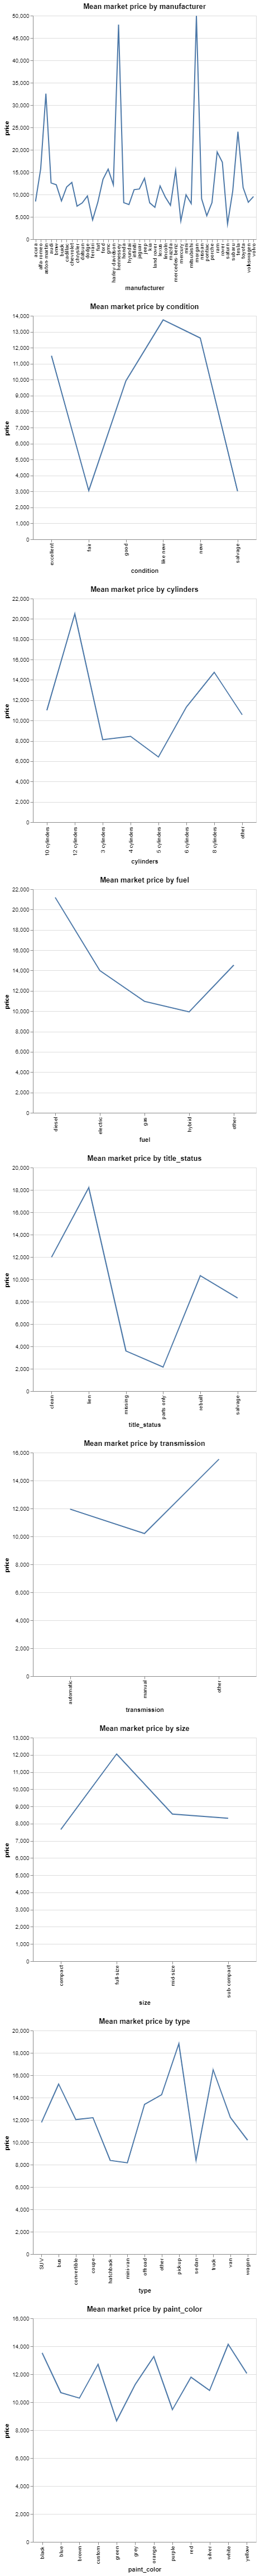

In [26]:
categorical_features = ['manufacturer', 'condition', 'cylinders', 'fuel',
                        'title_status', 'transmission', 'size', 'type', 'paint_color']

categorical_encodings = ['manufacturer', 'condition', 'cylinders', 'fuel',
                        'title_status', 'transmission', 'size', 'type', 'paint_color']

base = alt.Chart().mark_line().encode(
    alt.Y('price:Q')
).properties(
    width=400,
    height=400
)

chart = alt.vconcat()
for i in range(len(categorical_features)):
        vehicles_graph = vehicles[['price', categorical_features[i]]].groupby(by = categorical_features[i])\
                                                                     .mean()\
                                                                     .reset_index()
        row = alt.hconcat(data = vehicles_graph)
        row |= base.encode(alt.X(categorical_encodings[i])).properties(title = f'Mean market price by {categorical_features[i]}')
        
        chart &= row
        
chart    
